<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 3 - Ensamblados y modelos avanzados </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Técnicas de ensamblado: *bagging*, *boosting* y *random forest*.
* Ventajas de técnicas de ensamblados
* Problemas desbalanceados
 

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y cierre competencia: 17 de Enero
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea3-INF393-II-2019]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Ensamblados para regresión  
[2.](#segundo) Detección de acoso en *Twitter*  

<a id="primero"></a>
## 1. Ensamblados para regresión
---
Las técnicas de ensamblados vistos en clases pueden ser aplicadas tanto a problemas de clasificación o regresión, teniendo la ventaja de utilizar múltiples modelos de aprendizaje para utilizar la ventaja de cada uno. En este actividad se trabajará con predecir la temperatura media de un día, dada cierta información del día anterior, como la humedad, velocidad del viento, presión atmosférica, fecha y temperatura. El modelo predictor derivado puede ser bastante útil para conocer el comportamiento del clima a lo largo del tiempo.

<img src="https://scijinks.gov/review/forecast-reliability/forecast-reliability2.jpg" title="Title text" width="70%"  />

Los datos de clima son recolectados en la ciudad Delhi de India por un período de 4 años (2013 a 2017), proporcionados en Kaggle a través del siguiente __[link](https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data)__, las particiones de entrenamiento y prueba están dadas. El registro de cada dato corresponde a un día, incrementando a través de las filas por cada día.

---
    
>  Cargue los datos en un dataframe de pandas, además agregue una columna indicando el valor a predecir, la temperatura media del día siguiente. *Como el último dato/registro no tiene un valor a predecir éste se elimina*.
```python
import pandas as pd
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row
```

> Debido a la poca información que se tiene a través de los 4 parámetros medidos, extraíga más información a través de los datos de fecha. Por ejemplo, el comportamiento a través de los meses y años varía, así como la información de la temporada del año podría ayudar a la predicción. Decida si puede incluir más información a partir de la fecha que tenga sentido con el problema.
```python
...#procesamiento de fecha(datetime/timestamp) a numeros
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre
...#based on: https://en.wikipedia.org/wiki/Climate_of_India
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season']) #to one hot.. as nominal variable
... #any more information?
df.drop(["date"], axis=1, inplace=True) #delete date
```

> Cree las matrices de entrenamiento, con los mil primeros registros, y de validación, con el resto. Para evitar el orden natural en que vienen los datos entrenados, realice un *shuffle* aleatorio.
```python
y = df.pop("y_value").values
X = df.values 
X_train = X[:1000]
y_train = y[:1000]
X_val = X[1000:]
y_val = y[1000:]
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0) #shuffle values on train only
```

In [2]:
!unzip daily-climate-time-series-data.zip

Archive:  daily-climate-time-series-data.zip
  inflating: DailyDelhiClimateTest.csv  
  inflating: DailyDelhiClimateTrain.csv  


In [1]:
import pandas as pd
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row

df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre

seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season']) #to one hot.. as nominal variable


In [9]:
df

,date,meantemp,humidity,wind_speed,meanpressure,y_value,cday,year,month,season_fall,season_rainy,season_summer,season_winter
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,7.400000,1,2013,1,0,0,0,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,7.166667,2,2013,1,0,0,0,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,8.666667,3,2013,1,0,0,0,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,6.000000,4,2013,1,0,0,0,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.000000,5,2013,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2016-12-27,16.850000,67.550000,8.335000,1017.200000,17.217391,1,2016,12,0,0,0,1
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,15.238095,2,2016,12,0,0,0,1
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,14.095238,3,2016,12,0,0,0,1
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,15.052632,4,2016,12,0,0,0,1


In [2]:
y = df.pop("y_value").values
 #delete date
X = df.drop(["date"], axis=1).values 
X_train = X[:1000]
y_train = y[:1000]
X_val = X[1000:]
y_val = y[1000:]
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=0) #shuffle values on train only

In [3]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10
0,10.000000,84.500000,0.000000,1015.666667,1.0,2013.0,1.0,0.0,0.0,0.0,1.0
1,7.400000,92.000000,2.980000,1017.800000,2.0,2013.0,1.0,0.0,0.0,0.0,1.0
2,7.166667,87.000000,4.633333,1018.666667,3.0,2013.0,1.0,0.0,0.0,0.0,1.0
3,8.666667,71.333333,1.233333,1017.166667,4.0,2013.0,1.0,0.0,0.0,0.0,1.0
4,6.000000,86.833333,3.700000,1016.500000,5.0,2013.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1456,16.850000,67.550000,8.335000,1017.200000,1.0,2016.0,12.0,0.0,0.0,0.0,1.0
1457,17.217391,68.043478,3.547826,1015.565217,2.0,2016.0,12.0,0.0,0.0,0.0,1.0
1458,15.238095,87.857143,6.000000,1016.904762,3.0,2016.0,12.0,0.0,0.0,0.0,1.0
1459,14.095238,89.666667,6.266667,1017.904762,4.0,2016.0,12.0,0.0,0.0,0.0,1.0


> a) Describa el problema trabajado, la cantida de datos que se cuenta como las características a trabajar. Al ser datos temporales podría ayudar una ilustración gráfica de la secuencias trabajadas y su comportamiento ¿Es válido el uso de la información sólo del día anterior?.

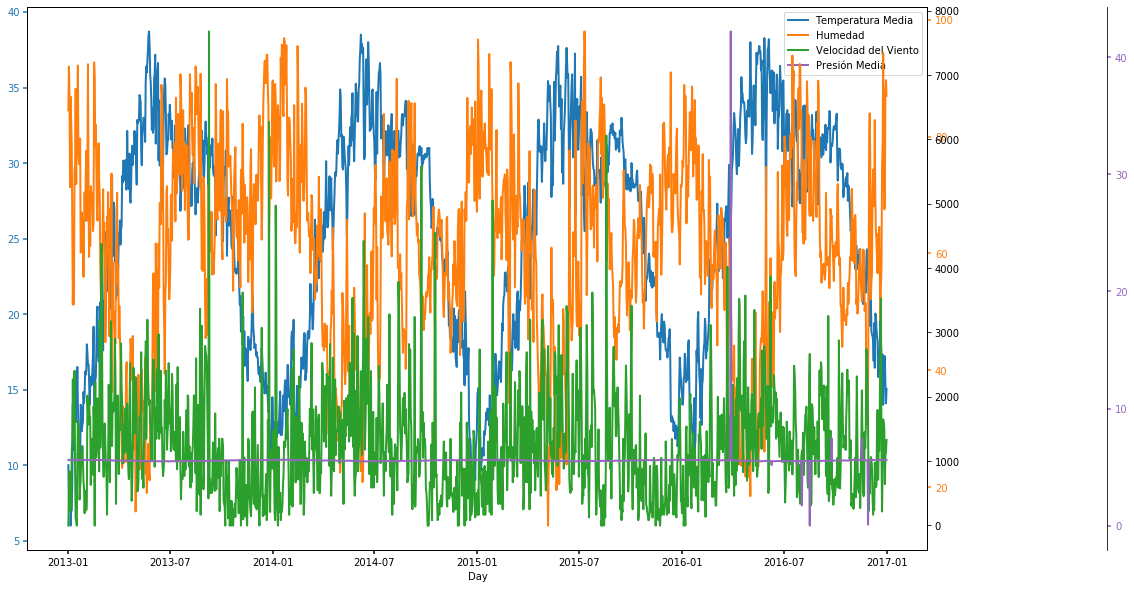

In [5]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx() 
par3 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot( 'date', 'meantemp', data=df, marker='', color='tab:blue', linewidth=2, label="Temperatura Media")
p2, = par1.plot( 'date', 'humidity', data=df, marker='', color='tab:orange', linewidth=2, label="Humedad")
p3, = par2.plot( 'date', 'wind_speed', data=df, marker='', color='tab:green', linewidth=2, label="Velocidad del Viento")
p4, = par3.plot( 'date', 'meanpressure', data=df, marker='', color='tab:purple', linewidth=2, label="Presión Media")


host.set_xlabel("Day")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par2.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

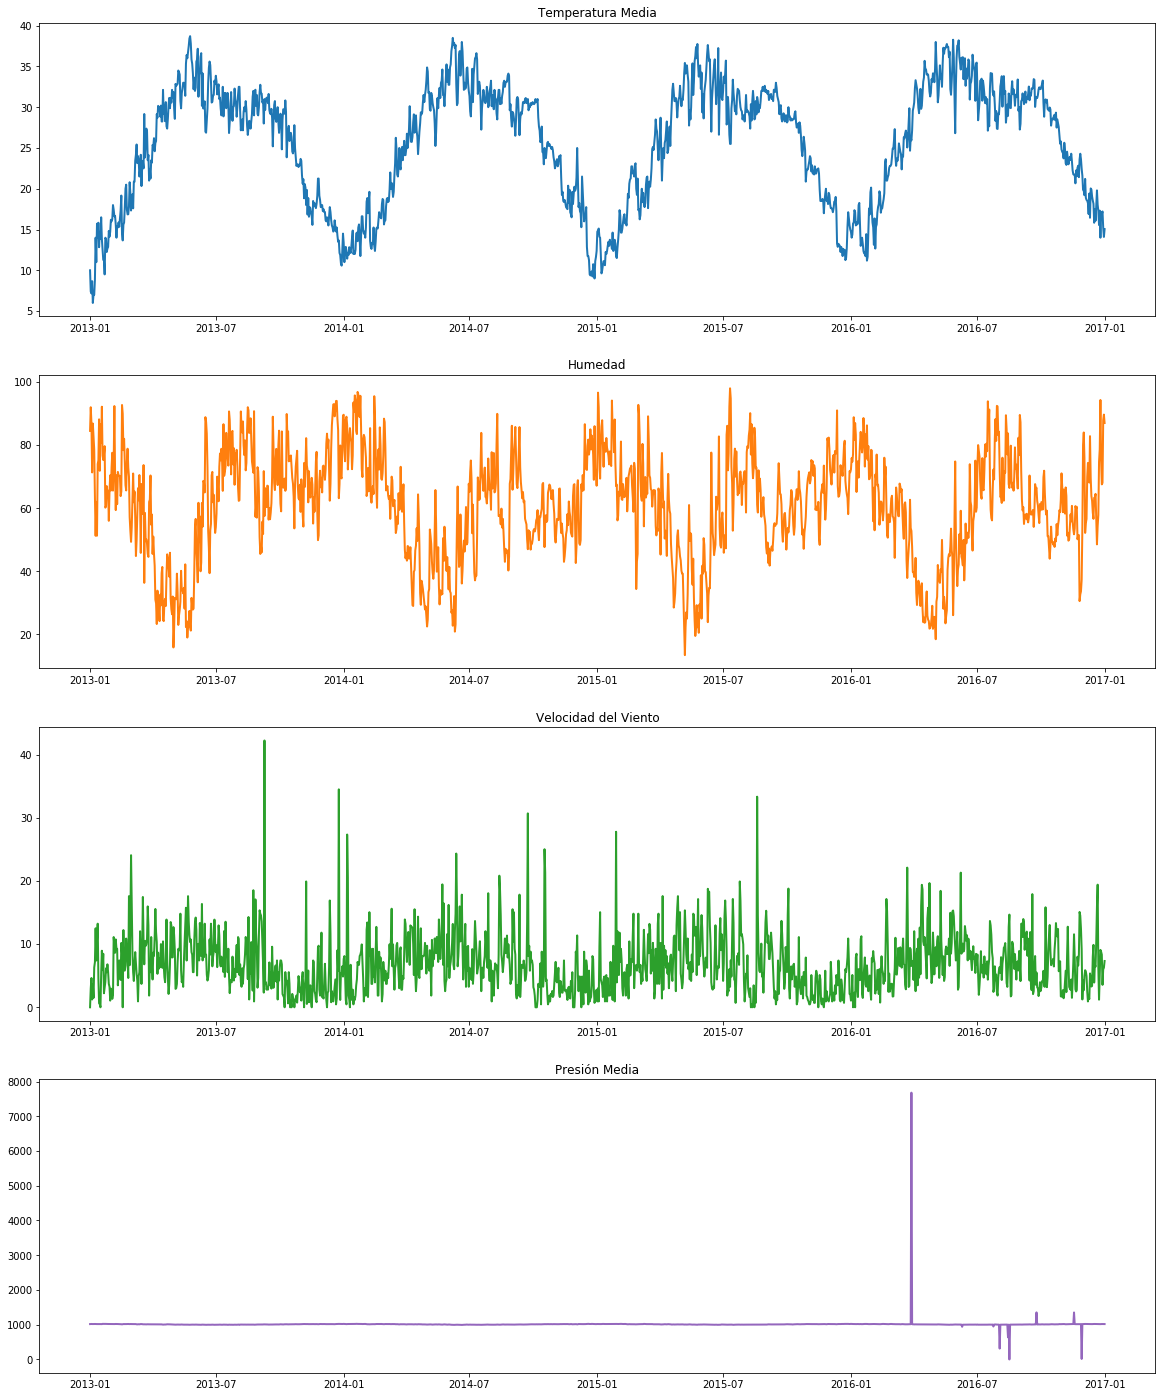

In [6]:
fig, axs = plt.subplots(4)
plt.subplots_adjust(top=2)

axs[0].plot( 'date', 'meantemp', data=df, marker='', color='tab:blue', linewidth=2, label="Temperatura Media")
axs[1].plot( 'date', 'humidity', data=df, marker='', color='tab:orange', linewidth=2, label="Humedad")
axs[2].plot( 'date', 'wind_speed', data=df, marker='', color='tab:green', linewidth=2, label="Velocidad del Viento")
axs[3].plot( 'date', 'meanpressure', data=df, marker='', color='tab:purple', linewidth=2, label="Presión Media")

axs[0].set_title('Temperatura Media')
axs[1].set_title('Humedad')
axs[2].set_title('Velocidad del Viento')
axs[3].set_title('Presión Media')


plt.show()

In [7]:
df.shape

(1461, 12)

In [8]:
print("Datos de otoño: ", df.loc[df['season_fall'] == 1].size)
print("Datos de rainy (primavera?): ",df.loc[df['season_rainy'] == 1].size)
print("Datos de verano: ",df.loc[df['season_summer'] == 1].size)
print("Datos de invierno: ",df.loc[df['season_winter'] == 1].size)


Datos de otoño:  4368
Datos de rainy (primavera?):  4416
Datos de verano:  4416
Datos de invierno:  4332


# A PARTIR DE ESTE PUNTO NO SE HABÍA GUARDADO EL JUPYTER, POR LO QUE TUVE QUE HACERLO DENUEVO, TE PIDO PERDÓN SI OLVIDE HACER ALGO

Definitivamente no es valido el uso solo del año anterior, es posible observar que los datos se tienden a comportar de una manera bastante similar en cada temporada del año

> b) Entrene un solo Árbol de Regresión de múltiples niveles para resolver el problema. Defina un Árbol **no regularizado** (como el que no tiene límites en su profundidad) y otro Árbol **regularizado** (variando los hiper-parámetros que prefiera, por ejemplo, los más comunes como la profundidad, el número mínimo de datos para realizar *split* o el número mínimo de datos en cada hoja). Además comente sobre la ventaja de usar un árbol de decisión respecto a la escala de los datos ¿Porqué no es necesario escalar los datos?
```python
import numpy as np
def RMSE(ytrue,ypred):
    return np.sqrt(np.mean(np.square(ytrue - ypred)) )
from sklearn.tree import DecisionTreeRegressor as Tree
model_unr = Tree() #unregularized model -- default parameters
model_unr.fit(X_train,y_train)
... #define your regularized tree model
``` 

In [9]:
import numpy as np
def RMSE(ytrue,ypred):
    return np.sqrt(np.mean(np.square(ytrue - ypred)) )
from sklearn.tree import DecisionTreeRegressor as Tree
model_unr = Tree() #unregularized model -- default parameters
model_unr.fit(X_train,y_train)



DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [10]:
import numpy as np
def RMSE(ytrue,ypred):
    return np.sqrt(np.mean(np.square(ytrue - ypred)) )
from sklearn.tree import DecisionTreeRegressor as Tree
model_reg = Tree(max_depth=10) 
model_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

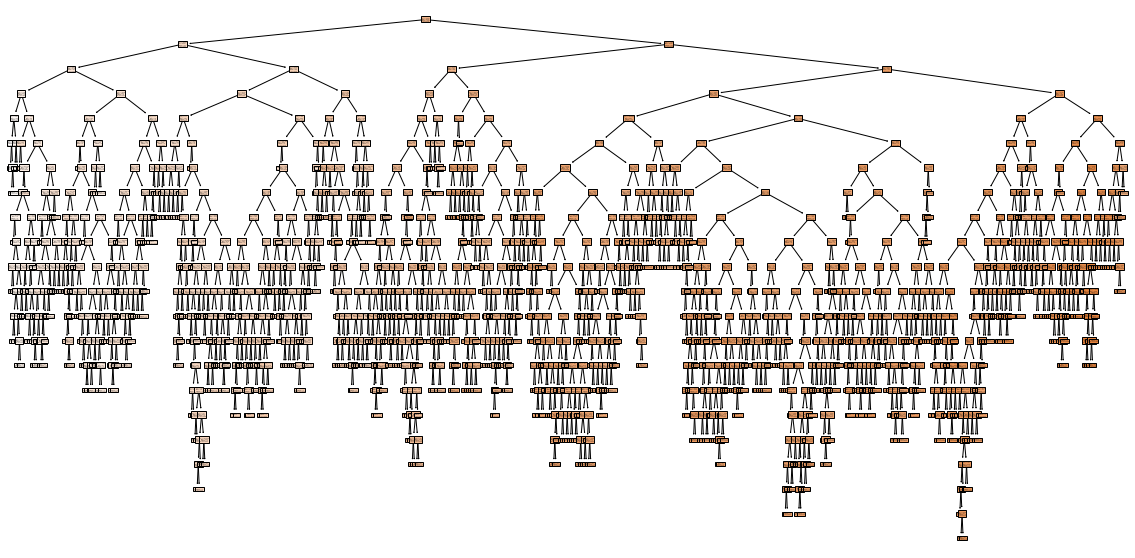

In [11]:
from sklearn.tree import plot_tree
plt.figure()
plot_tree(model_unr, filled=True)
plt.show()

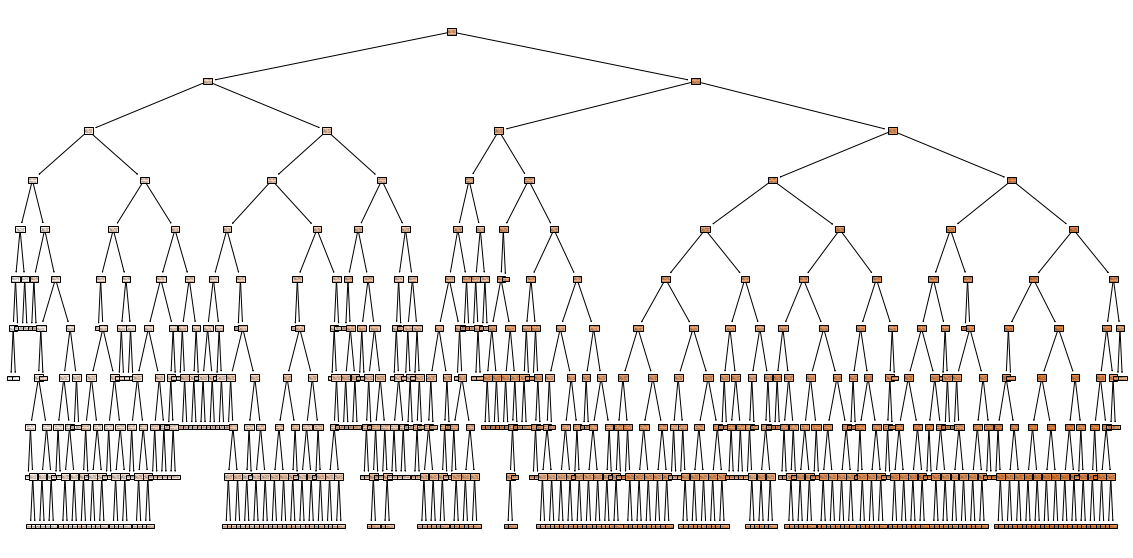

In [12]:
plt.figure()
plot_tree(model_reg, filled=True)
plt.show()

No es necesario escalar los datos, por que al ser datos como temperatura, presión, etc, estos ya estan escalados, en el sentido de que son valores restringidos por la naturaleza (No vamos a tener 200 grados en el ambiente)

> c) Para evaluar la calidad de predicción en este problema se utilizará la métrica *Root Mean Squared Error* (RMSE), indicando un error en la escala real de la temperatura. Como los datos de validación siguen con el orden temporal, visualice esa predicción a lo largo del tiempo. Comente sobre los resultados comparando la regularización *vs* el no regularizar.
```python
y_train_hat = model.predict(X_train)
y_val_hat = model.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()
```
    

RMSE train=  0.8225590812601147
RMSE val=  2.387629398087721


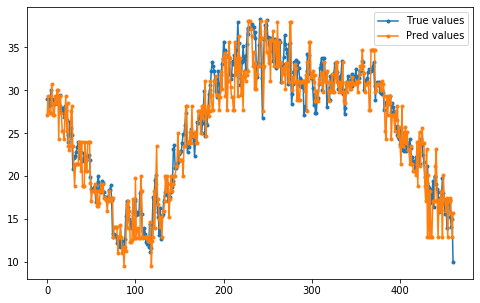

In [14]:
y_train_hat = model_reg.predict(X_train)
y_val_hat = model_reg.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()

> d) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **Bagging**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en b)*) ¿Qué debería suceder? ¿Se visualiza *overfitting*? Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro.
```python
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=Tree(...), n_estimators=..., n_jobs=-1)
```

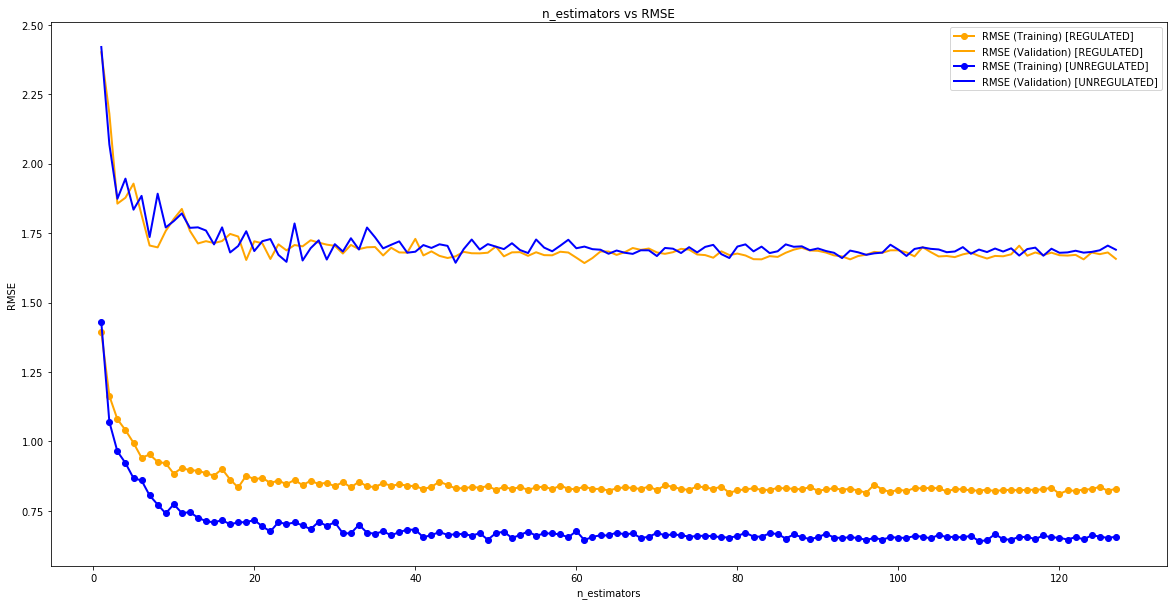

In [25]:
from sklearn.ensemble import BaggingRegressor

import pandas

accuracys_train = []
accuracys_val  = []
accuracys_train_unr = []
accuracys_val_unr  = []


for x in range(1,128):
    model_reg = BaggingRegressor(base_estimator=Tree(max_depth=10), n_estimators=x, n_jobs=-1)
    model_reg.fit(X_train,y_train)
    
    model_unregulated = BaggingRegressor(base_estimator=Tree(), n_estimators=x, n_jobs=-1)
    model_unregulated.fit(X_train,y_train)
    
    
    y_train_hat = model_reg.predict(X_train)
    accuracys_train.append((x,RMSE(y_train,y_train_hat)))
    y_val_hat = model_reg.predict(X_val)
    accuracys_val.append((x,RMSE(y_val,y_val_hat)))
    
    y_train_hat = model_unregulated.predict(X_train)
    accuracys_train_unr.append((x,RMSE(y_train,y_train_hat)))
    y_val_hat = model_unregulated.predict(X_val)
    accuracys_val_unr.append((x,RMSE(y_val,y_val_hat)))
    

df_accuracys_train = pandas.DataFrame(accuracys_train, columns=["n_estimators", "RMSE (Training) [REGULATED]"])
df_accuracys_val = pandas.DataFrame(accuracys_val, columns=["n_estimators", "RMSE (Validation) [REGULATED]"])
df_accuracys_train_unr = pandas.DataFrame(accuracys_train_unr, columns=["n_estimators", "RMSE (Training) [UNREGULATED]"])
df_accuracys_val_unr = pandas.DataFrame(accuracys_val_unr, columns=["n_estimators", "RMSE (Validation) [UNREGULATED]"])
    
plt.plot( 'n_estimators', 'RMSE (Training) [REGULATED]', data=df_accuracys_train, marker='o', color='orange', linewidth=2)
plt.plot( 'n_estimators', 'RMSE (Validation) [REGULATED]', data=df_accuracys_val, marker='', color='orange', linewidth=2)

plt.plot( 'n_estimators', 'RMSE (Training) [UNREGULATED]', data=df_accuracys_train_unr, marker='o', color='blue', linewidth=2)
plt.plot( 'n_estimators', 'RMSE (Validation) [UNREGULATED]', data=df_accuracys_val_unr, marker='', color='blue', linewidth=2)


plt.title('n_estimators vs RMSE')
plt.ylabel('RMSE')
plt.xlabel('n_estimators')
plt.legend()





    
    

Deberia ser mejor que entrenar solo el arbol, no se visualiza overfitting.

> e) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **AdaBoost**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en d)* ¿Se visualiza *overfitting*? ¿Qué técnica utiliza la librería de sklearn, *re-muestrear* o *pesar* ejemplos? ¿Qué le parece más sensato?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).
```python
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(base_estimator=Tree(...), n_estimators=...)
```

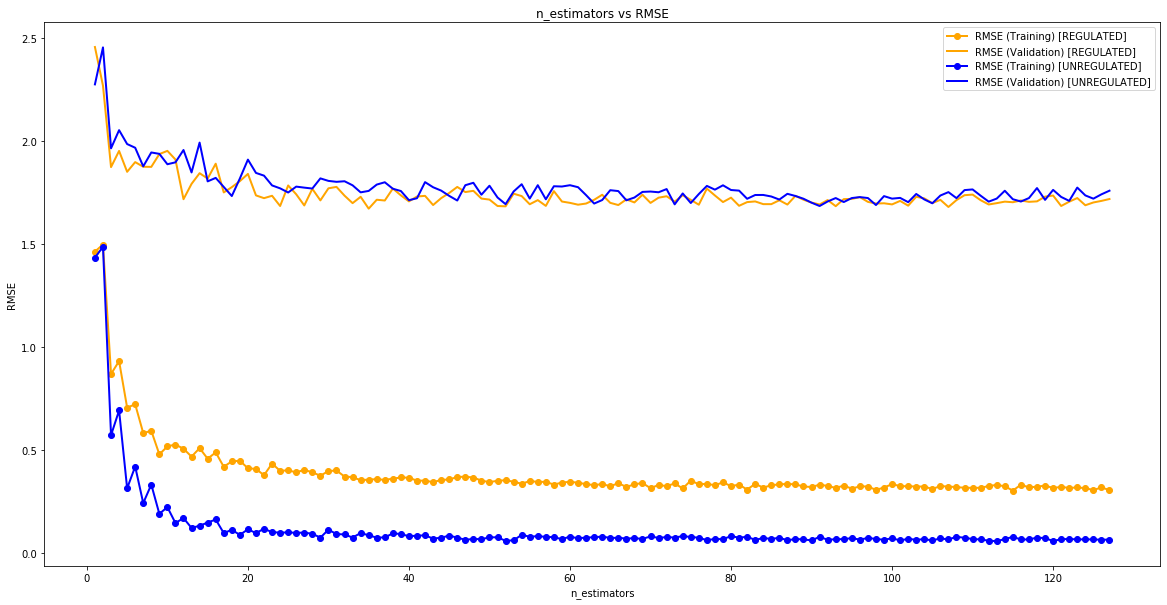

In [27]:
from sklearn.ensemble import AdaBoostRegressor

import pandas

accuracys_train = []
accuracys_val  = []
accuracys_train_unr = []
accuracys_val_unr  = []


for x in range(1,128):
    model_reg = AdaBoostRegressor(base_estimator=Tree(max_depth=10), n_estimators=x)
    model_reg.fit(X_train,y_train)

    model_unregulated = AdaBoostRegressor(base_estimator=Tree(), n_estimators=x)
    model_unregulated.fit(X_train,y_train)
    
    y_train_hat = model_reg.predict(X_train)
    accuracys_train.append((x,RMSE(y_train,y_train_hat)))
    y_val_hat = model_reg.predict(X_val)
    accuracys_val.append((x,RMSE(y_val,y_val_hat)))
    
    y_train_hat = model_unregulated.predict(X_train)
    accuracys_train_unr.append((x,RMSE(y_train,y_train_hat)))
    y_val_hat = model_unregulated.predict(X_val)
    accuracys_val_unr.append((x,RMSE(y_val,y_val_hat)))
    

df_accuracys_train = pandas.DataFrame(accuracys_train, columns=["n_estimators", "RMSE (Training) [REGULATED]"])
df_accuracys_val = pandas.DataFrame(accuracys_val, columns=["n_estimators", "RMSE (Validation) [REGULATED]"])
df_accuracys_train_unr = pandas.DataFrame(accuracys_train_unr, columns=["n_estimators", "RMSE (Training) [UNREGULATED]"])
df_accuracys_val_unr = pandas.DataFrame(accuracys_val_unr, columns=["n_estimators", "RMSE (Validation) [UNREGULATED]"])
    
plt.plot( 'n_estimators', 'RMSE (Training) [REGULATED]', data=df_accuracys_train, marker='o', color='orange', linewidth=2)
plt.plot( 'n_estimators', 'RMSE (Validation) [REGULATED]', data=df_accuracys_val, marker='', color='orange', linewidth=2)

plt.plot( 'n_estimators', 'RMSE (Training) [UNREGULATED]', data=df_accuracys_train_unr, marker='o', color='blue', linewidth=2)
plt.plot( 'n_estimators', 'RMSE (Validation) [UNREGULATED]', data=df_accuracys_val_unr, marker='', color='blue', linewidth=2)


plt.title('n_estimators vs RMSE')
plt.ylabel('RMSE')
plt.xlabel('n_estimators')
plt.legend()



    

Utiliza pesar ejemplos, se ven resultados bastante similares con ambas tecnicas, aunque un poco mejores con Bagging no produce overfitting (si bien en training el RMSE tiende a 0, no empeora en validation)

> f) Pruebe otra técnica de ensamblado dedicada a árboles de decisión, que combina el muestreo *boostrap* de *Bagging* con muestreo sobre las *features*: **Random Forest**, compare el Árbol **no regularizado** con el **regularizado** ¿Se visualiza *overfitting*?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro.
```python
from sklearn.ensemble import RandomForestClassifier
model_unr = RandomForestClassifier(n_estimators=..., n_jobs=-1)
... #define your regularized random forest model
```

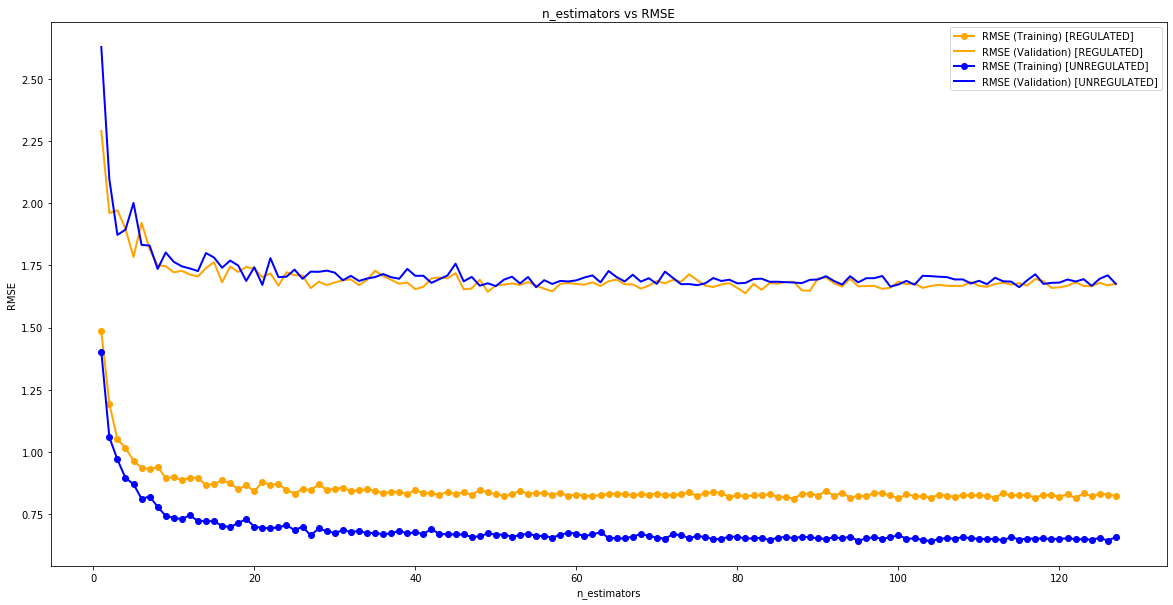

In [29]:
from sklearn.ensemble import RandomForestRegressor

import pandas

accuracys_train = []
accuracys_val  = []
accuracys_train_unr = []
accuracys_val_unr  = []


for x in range(1,128):
    model_reg = RandomForestRegressor(max_depth=10, n_estimators=x, n_jobs=-1)
    model_reg.fit(X_train,y_train)
    
    model_unregulated = RandomForestRegressor(n_estimators=x, n_jobs=-1)
    model_unregulated.fit(X_train,y_train)
    
    y_train_hat = model_reg.predict(X_train)
    accuracys_train.append((x,RMSE(y_train,y_train_hat)))
    y_val_hat = model_reg.predict(X_val)
    accuracys_val.append((x,RMSE(y_val,y_val_hat)))
    
    y_train_hat = model_unregulated.predict(X_train)
    accuracys_train_unr.append((x,RMSE(y_train,y_train_hat)))
    y_val_hat = model_unregulated.predict(X_val)
    accuracys_val_unr.append((x,RMSE(y_val,y_val_hat)))
    

df_accuracys_train = pandas.DataFrame(accuracys_train, columns=["n_estimators", "RMSE (Training) [REGULATED]"])
df_accuracys_val = pandas.DataFrame(accuracys_val, columns=["n_estimators", "RMSE (Validation) [REGULATED]"])
df_accuracys_train_unr = pandas.DataFrame(accuracys_train_unr, columns=["n_estimators", "RMSE (Training) [UNREGULATED]"])
df_accuracys_val_unr = pandas.DataFrame(accuracys_val_unr, columns=["n_estimators", "RMSE (Validation) [UNREGULATED]"])
    
plt.plot( 'n_estimators', 'RMSE (Training) [REGULATED]', data=df_accuracys_train, marker='o', color='orange', linewidth=2)
plt.plot( 'n_estimators', 'RMSE (Validation) [REGULATED]', data=df_accuracys_val, marker='', color='orange', linewidth=2)

plt.plot( 'n_estimators', 'RMSE (Training) [UNREGULATED]', data=df_accuracys_train_unr, marker='o', color='blue', linewidth=2)
plt.plot( 'n_estimators', 'RMSE (Validation) [UNREGULATED]', data=df_accuracys_val_unr, marker='', color='blue', linewidth=2)


plt.title('n_estimators vs RMSE')
plt.ylabel('RMSE')
plt.xlabel('n_estimators')
plt.legend()




No se ve overffitting,  los valores se ven similares a bagging

> g) Verifique que el **OOB error** (*out of bag error*) de los ensambladores que utilizan la técnica *boostrap* puede ser una alternativa como métrica de generalización, compare con el error calculado sobre el conjunto de validación (o en su defecto *cross validation*).
```python
oob_error = model.oob_score_
val_error = model.score(X_val,y_val)
print("OOB error: ",oob_error)
print ("Val error: ",val_error)
```

In [35]:
model = RandomForestRegressor(max_depth=10, n_estimators=40, n_jobs=-1,oob_score=True )
model.fit(X_train,y_train)
oob_error = model.oob_score_
val_error = model.score(X_val,y_val)
print("OOB error: ",oob_error)
print ("Val error: ",val_error)

OOB error:  0.942382963219692
Val error:  0.9426740819210674


Se ven valores bastantes similares

> h) Defina otra forma de combinar los valores que entregan los ensamblados al hacer predicciones y compare con lo que se hace actualmente, por ejemplo *Bagging* realiza el voto de la mayoría para clasificación y promedio para regresión, *AdaBoost* realiza una combinación ponderada de cada clasificador dependiendo de su *habilidad* (desempeño para clasificar el conjunto de entrenamiento). Se puede inspirar desde clásicos estadísticos, como entregar el primer cuartíl ($Q_1$) si al ensamblado le cuesta predecir valores bajos, o el segundo cuartil ($Q_2$) o mediana para ser robusto a predicciones atípicas de modelos.  
```python
def combine_predictions(predictions):
    return #define !
list_estimators = model.estimators_
list_predictions = [estimator.predict(X_val) for estimator in list_estimators]
new_predictions = combine_predictions(list_predictions)
print("RMSE val= ",RMSE(y_val, new_predictions))
```

In [36]:
def combine_predictions(predictions):
    return np.mean(predictions)
list_estimators = model.estimators_
list_predictions = [estimator.predict(X_val) for estimator in list_estimators]
new_predictions = combine_predictions(list_predictions)
print("RMSE val= ",RMSE(y_val, new_predictions))

RMSE val=  7.100014109924751


> i) Si se cuenta con una gran cantidad de modelos en el ensamblado, por ejemplo $T>100$, se puede crear un intervalo de confianza de la predicción a través de todos estos valores, asumiendo una distribución Normal centrada en la media muestral de las predicciones, con desviación estándar muestral en las predicciones. El intervalo de confianza entrega más información que un único valor puntual de predicción. Visualice un intervalo de confianza al 95% de probabilidad en la predicción a lo largo de la serie de tiempo de validación, comente. Al asumir una distribución Normal, también puede explorar el tomar como predicción del ensamblado el muestreo sobre la distribución Normal creada entorno a los datos muestrales.
```python
X_val_est = np.vstack(list_predictions).T #has shape=(N_test, n_estimator), with n_estimator>100
from scipy.stats import norm
interv_val = []
for n in range(X_val.shape[0]):
    low, up = norm.interval(0.95, loc=np.mean(X_val_est[n]), scale=np.std(X_val_est[n]))
    interv_val.append([low,up])
interv_val = np.asarray(interv_val)
x = np.arange(X_val_est.shape[0])
plt.figure(figsize=(8,5))
plt.plot(x, np.mean(X_val_est, axis=1))
plt.fill_between(x, interv_val[:,0], interv_val[:,1], color='r', alpha=.55)
plt.show()
```

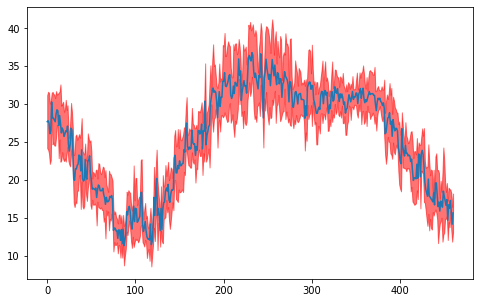

In [37]:
X_val_est = np.vstack(list_predictions).T #has shape=(N_test, n_estimator), with n_estimator>100
from scipy.stats import norm
interv_val = []
for n in range(X_val.shape[0]):
    low, up = norm.interval(0.95, loc=np.mean(X_val_est[n]), scale=np.std(X_val_est[n]))
    interv_val.append([low,up])
interv_val = np.asarray(interv_val)
x = np.arange(X_val_est.shape[0])
plt.figure(figsize=(8,5))
plt.plot(x, np.mean(X_val_est, axis=1))
plt.fill_between(x, interv_val[:,0], interv_val[:,1], color='r', alpha=.55)
plt.show()

    
>  j) Evalúe y visualice la predicción del mejor modelo encontrado para resolver este problema, en el conjunto de pruebas. Además, compare y analice las distintas maneras con las que se resolvió el problema, incluya las decisiones que conlleva y los resultados que reflejan.
```python
df = pd.read_csv("DailyDelhiClimateTest.csv")
```

OOB error:  0.942382963219692
Val error:  0.9261903759075665


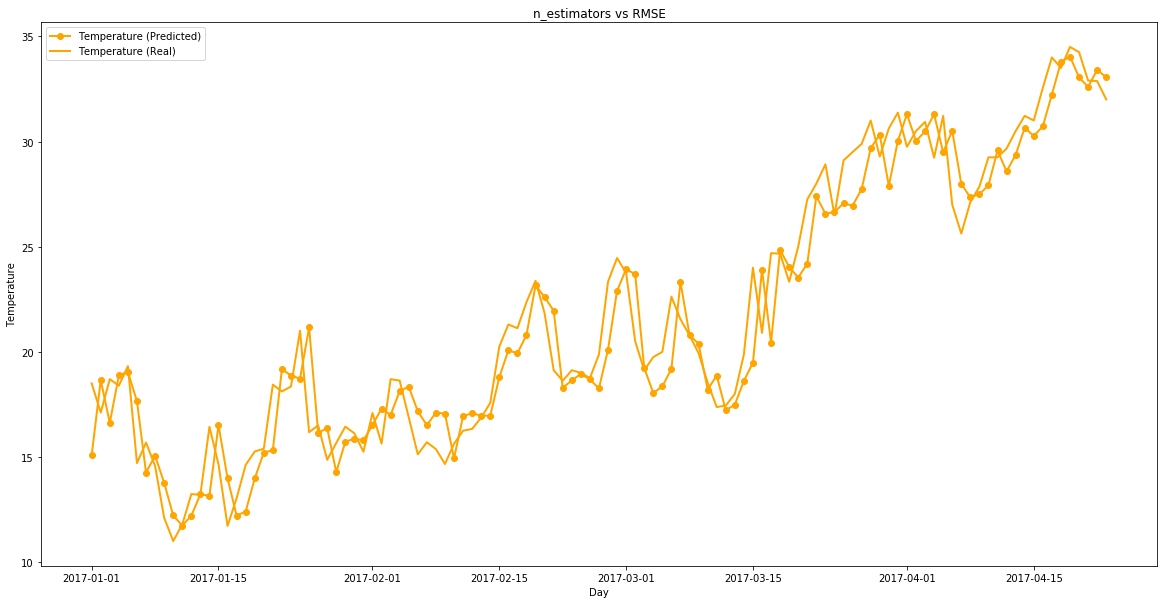

In [68]:
df_test = pd.read_csv("DailyDelhiClimateTest.csv")
df_test["y_value"] = df_test["meantemp"].shift(-1)
df_test = df_test.iloc[:-1] #remove last row

df_test["date"] = pd.to_datetime(df_test["date"])
df_test['cday'] = df_test['date'].dt.dayofweek #0:lunes,6:domingo
df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month #1:enero, 12: diciembre

seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df_test['season'] = [ seasons[month_i - 1] for month_i in df_test['month'].values ]


df_test = pd.get_dummies(df_test,columns=['season']) #to one hot.. as nominal variable


for x in ["winter", "summer", "rainy", "fall"]:
    if "season_"+x not in df_test:
        df_test["season_"+x] = 0


y = df_test.pop("y_value").values
 #delete date
X = df_test.drop(["date"], axis=1).values 



predicted_y = model.predict(X)
preditected_df = pandas.DataFrame({"Day": df_test.date, "Temperature (Predicted)": predicted_y})
real_df = pandas.DataFrame({"Day": df_test.date, "Temperature (Real)": y})


plt.plot( 'Day', 'Temperature (Predicted)', data=preditected_df, marker='o', color='orange', linewidth=2)
plt.plot( 'Day', 'Temperature (Real)', data=real_df, marker='', color='orange', linewidth=2)


plt.title('n_estimators vs RMSE')
plt.ylabel('Temperature')
plt.xlabel('Day')
plt.legend()



    

val_error = model.score(X,y)
print("OOB error: ",oob_error)
print ("Val error: ",val_error)

Si vemos el error, se ve muy alto, pero al analizar el gráfico, es posible notar que las predicciones son bastante acertadas.

<a id="segundo"></a>
## 2. Detección de acoso en *Twitter*
---
En las redes sociales muchas veces se encuentra con un cierto comportamiento indeseable para los usuarios, tal como racismo, misógeno, grupos de odio o *trolls*. El poder detectar de manera automática ciertos patrones en el comportamiento para tomar una acción debe ser crucial para reducir el tiempo y esfuerzo humano. En esta actividad se trabajará sobre *tweets* la red social de *twitter* para detectar comportamiento *online* de acoso (*harassment*), que por lo general, incluye *flaming* como lenguaje abusivo o insultos, *doxing* como mostrar la información personal de una mujer, por ejemplo el domicilio o número de teléfono, la suplantación o la vergüenza pública por destruir la reputación de las personas.

<img src="https://kidshelpline.com.au/sites/default/files/bdl_image/header-T-OH.png" title="Title text" width="45%"  />

En algunos problemas como este, el comportamiento a detectar puede ser asociado a una anomalía (*outlier*) del comportamiento normal de los usuarios en las redes sociales. Esto es una de las causas de la dificultad del problema, puesto que es **altamente desbalanceado**, donde aproximadamente un 10% de los *tweets* corresponden a acoso (*harassment*).

Los datos trabajados corresponderan a *tweets* etiquetados como *harassment* (con valor 1) o no (con valor 0) -- la tarea a detectar--. Además si desea utilizar, se incluye la información del tipo de *harassment* en el conjunto de entrenamiento como atributos extras. El conjunto de pruebas solo contiene los *tweets* a ser etiquetados.

---
### Importante
* Esta pregunta será evaluada **sólo** por los resultados (*submission*) obtenidos en el desafío presentado en __[Kaggle](https://www.kaggle.com/c/t1-ml/)__ a través del siguiente __[link](https://www.kaggle.com/t/91f8c0c746f945cfa510b88469df4d67)__. Las notas serán entregadas a través de la siguiente fórmula:  
$$ Nota(i) = 100\cdot max\left(0.55; s^{(1-i)} \right), \ \ con \ \ i \in \{1,\ \ldots, N\}$$
Con la escala de decaimiento es $ s = 1.05$ y con $i$ su lugar en el *ranking*.

* La métrica de evaluación será el *f1 score* [[3]](#refs) sobre la clase positiva (*harassment*), así evaluar la calidad del modelo sobre la clase minoritaria, lo cual también debiera reflejar el desempeño de la clase negativa (al ser el complemento).
```python
from  sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='binary')
```

* El archivo de *submission* debe contener las predicciones de *harassment* (0 o 1) a cada dato de pruebas, además de la columna de *id* asociado al dato, iniciando en 1. Si leyó de manera ordenada el archivo de pruebas, se puede generar de la siguiente manera:
```python
df_aux = pd.DataFrame()
df_aux["id"] = np.arange(1, 1+y_pred.shape[0])
df_aux["harassment"] = y_pred.astype('int')
df_aux.to_csv("test_estimation.csv", index=False)
```

* Se solicita realizar **un solo** *submission* por grupo, para no perjudicar la nota de sus compañeros en el *ranking*. Además de ser claros con sus nombres de entrega para no asignarles de manera errónea su correspondiente nota.

* **Si no realiza *submission* a Kaggle su nota en esta sección será de 0**.

* **Si su *score* alcanzado es menor o igual al *benchmark* random que se encuentra en el *ranking*, su nota en esta sección será de 25**

In [87]:
from  sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

df = pd.read_csv("Train_data.csv")

df_train_text = df["tweet_content"]
labels_train = df["harassment"]

df_train_text, df_val_text, y_train, y_val  = train_test_split(df_train_text, labels_train, test_size=0.2, random_state=0)

from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
import re, time
def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ] # lo separa en diferentes palabras
    for word in wordtokens: 
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words


texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)
vocab = vectorizer.get_feature_names()



features_train = vectorizer.transform(texts_train)

X_train = vectorizer.transform(texts_train)
X_val = vectorizer.transform(texts_val)


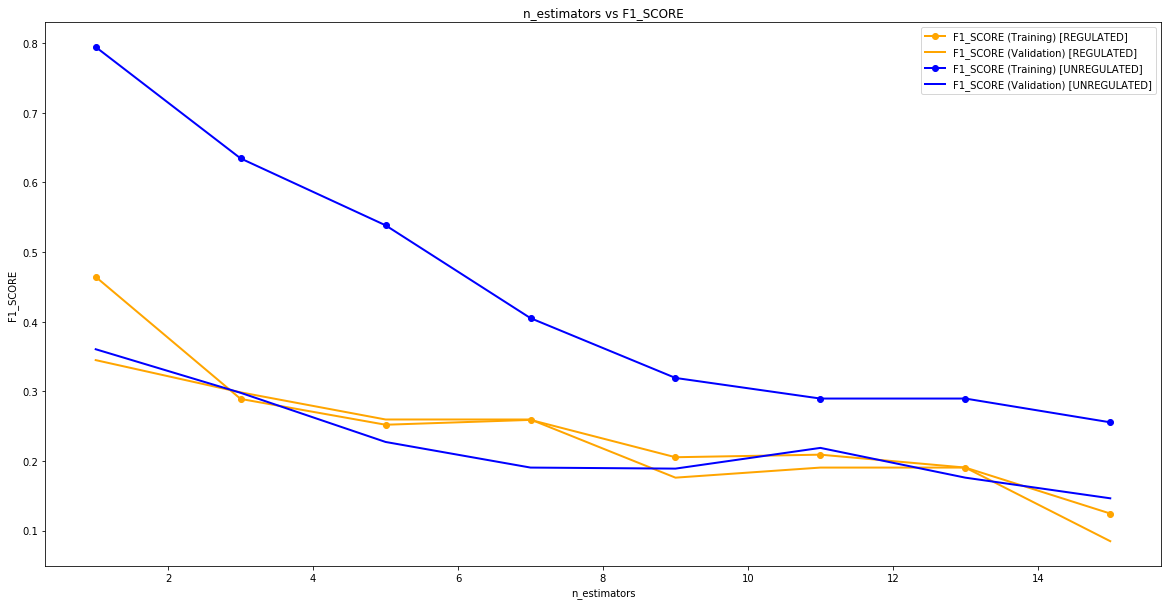

In [88]:
from sklearn.ensemble import BaggingRegressor

import pandas

accuracys_train = []
accuracys_val  = []
accuracys_train_unr = []
accuracys_val_unr  = []


for x in range(1,16,2):
    model_reg = BaggingRegressor(base_estimator=Tree(max_depth=10), n_estimators=x, n_jobs=-1)
    model_reg.fit(X_train,y_train)
    
    model_unregulated = BaggingRegressor(base_estimator=Tree(), n_estimators=x, n_jobs=-1)
    model_unregulated.fit(X_train,y_train)
    
    
    y_train_hat = model_reg.predict(X_train).astype('int')
    accuracys_train.append((x,f1_score(y_train,y_train_hat, average='binary')))
    y_val_hat = model_reg.predict(X_val).astype('int')
    accuracys_val.append((x,f1_score(y_val,y_val_hat, average='binary')))
    
    y_train_hat = model_unregulated.predict(X_train).astype('int')
    accuracys_train_unr.append((x,f1_score(y_train,y_train_hat, average='binary')))
    y_val_hat = model_unregulated.predict(X_val).astype('int')
    accuracys_val_unr.append((x,f1_score(y_val,y_val_hat, average='binary')))
    

df_accuracys_train = pandas.DataFrame(accuracys_train, columns=["n_estimators", "F1_SCORE (Training) [REGULATED]"])
df_accuracys_val = pandas.DataFrame(accuracys_val, columns=["n_estimators", "F1_SCORE (Validation) [REGULATED]"])
df_accuracys_train_unr = pandas.DataFrame(accuracys_train_unr, columns=["n_estimators", "F1_SCORE (Training) [UNREGULATED]"])
df_accuracys_val_unr = pandas.DataFrame(accuracys_val_unr, columns=["n_estimators", "F1_SCORE (Validation) [UNREGULATED]"])
    
plt.plot( 'n_estimators', 'F1_SCORE (Training) [REGULATED]', data=df_accuracys_train, marker='o', color='orange', linewidth=2)
plt.plot( 'n_estimators', 'F1_SCORE (Validation) [REGULATED]', data=df_accuracys_val, marker='', color='orange', linewidth=2)

plt.plot( 'n_estimators', 'F1_SCORE (Training) [UNREGULATED]', data=df_accuracys_train_unr, marker='o', color='blue', linewidth=2)
plt.plot( 'n_estimators', 'F1_SCORE (Validation) [UNREGULATED]', data=df_accuracys_val_unr, marker='', color='blue', linewidth=2)


plt.title('n_estimators vs F1_SCORE')
plt.ylabel('F1_SCORE')
plt.xlabel('n_estimators')
plt.legend()





    
    

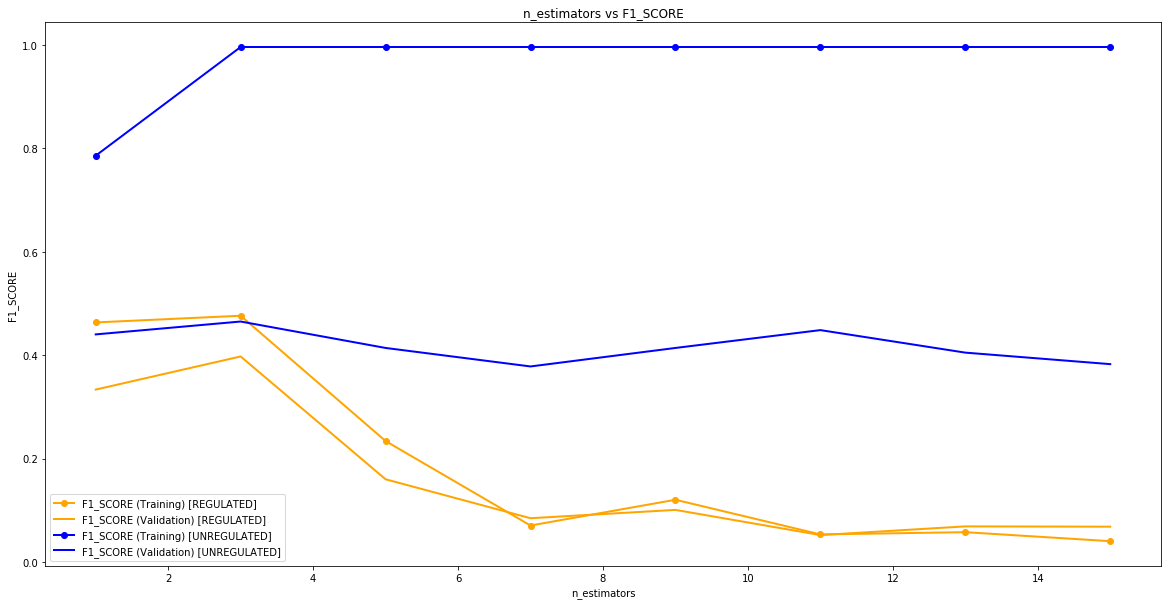

In [89]:
from sklearn.ensemble import AdaBoostRegressor

import pandas

accuracys_train = []
accuracys_val  = []
accuracys_train_unr = []
accuracys_val_unr  = []


for x in range(1,16,2):
    model_reg = AdaBoostRegressor(base_estimator=Tree(max_depth=10), n_estimators=x)
    model_reg.fit(X_train,y_train)
    
    model_unregulated = AdaBoostRegressor(base_estimator=Tree(), n_estimators=x)
    model_unregulated.fit(X_train,y_train)
    
    
    y_train_hat = model_reg.predict(X_train).astype('int')
    accuracys_train.append((x,f1_score(y_train,y_train_hat, average='binary')))
    y_val_hat = model_reg.predict(X_val).astype('int')
    accuracys_val.append((x,f1_score(y_val,y_val_hat, average='binary')))
    
    y_train_hat = model_unregulated.predict(X_train).astype('int')
    accuracys_train_unr.append((x,f1_score(y_train,y_train_hat, average='binary')))
    y_val_hat = model_unregulated.predict(X_val).astype('int')
    accuracys_val_unr.append((x,f1_score(y_val,y_val_hat, average='binary')))
    

df_accuracys_train = pandas.DataFrame(accuracys_train, columns=["n_estimators", "F1_SCORE (Training) [REGULATED]"])
df_accuracys_val = pandas.DataFrame(accuracys_val, columns=["n_estimators", "F1_SCORE (Validation) [REGULATED]"])
df_accuracys_train_unr = pandas.DataFrame(accuracys_train_unr, columns=["n_estimators", "F1_SCORE (Training) [UNREGULATED]"])
df_accuracys_val_unr = pandas.DataFrame(accuracys_val_unr, columns=["n_estimators", "F1_SCORE (Validation) [UNREGULATED]"])
    
plt.plot( 'n_estimators', 'F1_SCORE (Training) [REGULATED]', data=df_accuracys_train, marker='o', color='orange', linewidth=2)
plt.plot( 'n_estimators', 'F1_SCORE (Validation) [REGULATED]', data=df_accuracys_val, marker='', color='orange', linewidth=2)

plt.plot( 'n_estimators', 'F1_SCORE (Training) [UNREGULATED]', data=df_accuracys_train_unr, marker='o', color='blue', linewidth=2)
plt.plot( 'n_estimators', 'F1_SCORE (Validation) [UNREGULATED]', data=df_accuracys_val_unr, marker='', color='blue', linewidth=2)


plt.title('n_estimators vs F1_SCORE')
plt.ylabel('F1_SCORE')
plt.xlabel('n_estimators')
plt.legend()





    
    

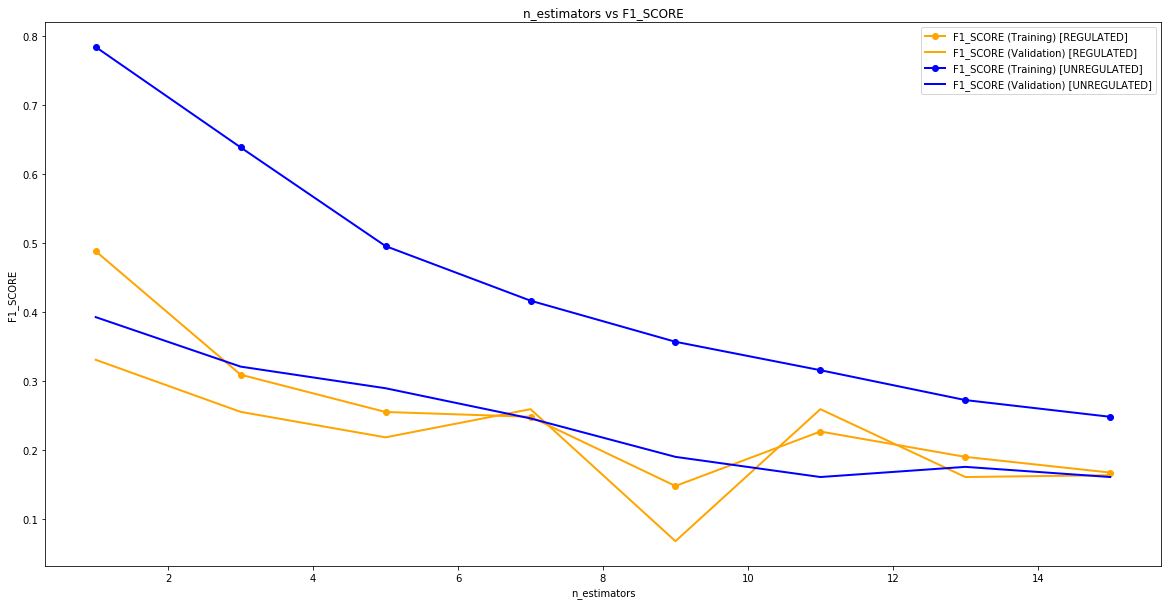

In [90]:
from sklearn.ensemble import RandomForestRegressor

import pandas

accuracys_train = []
accuracys_val  = []
accuracys_train_unr = []
accuracys_val_unr  = []


for x in range(1,16,2):
    model_reg = RandomForestRegressor(max_depth=10, n_estimators=x, n_jobs=-1)
    model_reg.fit(X_train,y_train)
    
    model_unregulated = RandomForestRegressor( n_estimators=x, n_jobs=-1)
    model_unregulated.fit(X_train,y_train)
    
    
    y_train_hat = model_reg.predict(X_train).astype('int')
    accuracys_train.append((x,f1_score(y_train,y_train_hat, average='binary')))
    y_val_hat = model_reg.predict(X_val).astype('int')
    accuracys_val.append((x,f1_score(y_val,y_val_hat, average='binary')))
    
    y_train_hat = model_unregulated.predict(X_train).astype('int')
    accuracys_train_unr.append((x,f1_score(y_train,y_train_hat, average='binary')))
    y_val_hat = model_unregulated.predict(X_val).astype('int')
    accuracys_val_unr.append((x,f1_score(y_val,y_val_hat, average='binary')))
    

df_accuracys_train = pandas.DataFrame(accuracys_train, columns=["n_estimators", "F1_SCORE (Training) [REGULATED]"])
df_accuracys_val = pandas.DataFrame(accuracys_val, columns=["n_estimators", "F1_SCORE (Validation) [REGULATED]"])
df_accuracys_train_unr = pandas.DataFrame(accuracys_train_unr, columns=["n_estimators", "F1_SCORE (Training) [UNREGULATED]"])
df_accuracys_val_unr = pandas.DataFrame(accuracys_val_unr, columns=["n_estimators", "F1_SCORE (Validation) [UNREGULATED]"])
    
plt.plot( 'n_estimators', 'F1_SCORE (Training) [REGULATED]', data=df_accuracys_train, marker='o', color='orange', linewidth=2)
plt.plot( 'n_estimators', 'F1_SCORE (Validation) [REGULATED]', data=df_accuracys_val, marker='', color='orange', linewidth=2)

plt.plot( 'n_estimators', 'F1_SCORE (Training) [UNREGULATED]', data=df_accuracys_train_unr, marker='o', color='blue', linewidth=2)
plt.plot( 'n_estimators', 'F1_SCORE (Validation) [UNREGULATED]', data=df_accuracys_val_unr, marker='', color='blue', linewidth=2)


plt.title('n_estimators vs F1_SCORE')
plt.ylabel('F1_SCORE')
plt.xlabel('n_estimators')
plt.legend()





    
    

In [ ]:
X_train = create_vector(texts_train,n_palabras_max)
X_val = create_vector(texts_val, n_palabras_max)


In [103]:
# Creo que este no es el mismo que mande en kraggle, pero perdi el que envie (sorry)

model =AdaBoostRegressor(base_estimator=Tree(), n_estimators=1)
model.fit(X_train,y_train)

df_aux = pd.read_csv("Test_input.csv")

text_test = [word_extractor(text) for text in df_aux['tweet_content']]
X_test = vectorizer.transform(text_test)

y_pred = model.predict(X_test)

df_aux["id"] = np.arange(1, 1+y_pred.shape[0])
df_aux["harassment"] = y_pred.astype('int')
df_aux.drop(["tweet_content"], axis=1, inplace=True)
df_aux.to_csv("test_estimation.csv", index=False)

df_aux['harassment'].sum()

100

In [108]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)


X_train = vectorizer.transform(texts_train)
X_val = vectorizer.transform(texts_val)




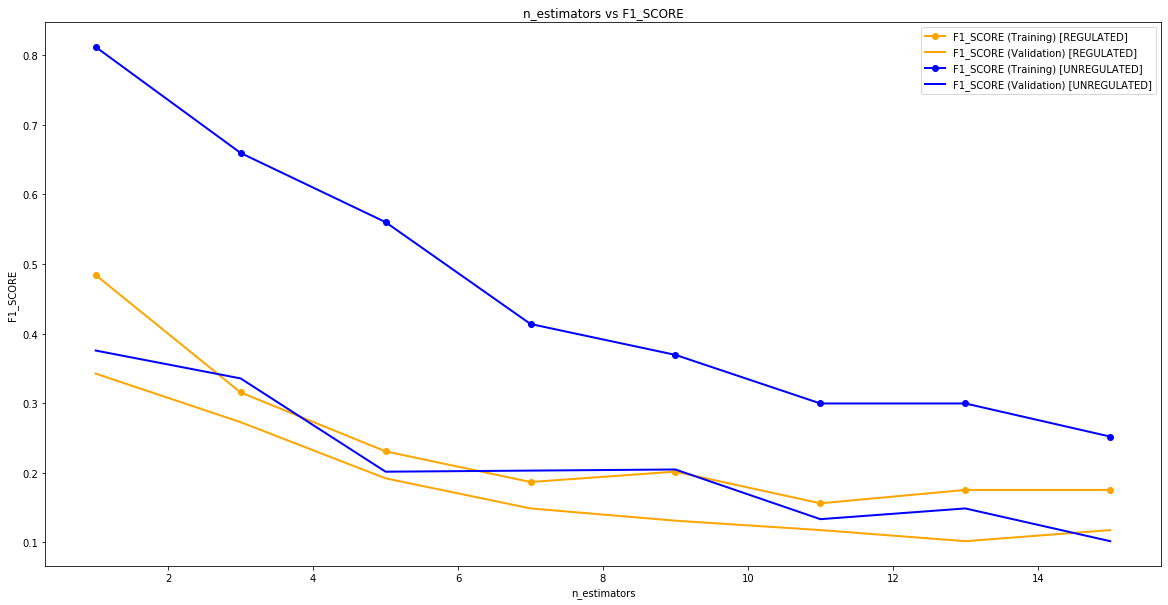

In [109]:
from sklearn.ensemble import BaggingRegressor

import pandas

accuracys_train = []
accuracys_val  = []
accuracys_train_unr = []
accuracys_val_unr  = []


for x in range(1,16,2):
    model_reg = BaggingRegressor(base_estimator=Tree(max_depth=10), n_estimators=x, n_jobs=-1)
    model_reg.fit(X_train,y_train)
    
    model_unregulated = BaggingRegressor(base_estimator=Tree(), n_estimators=x, n_jobs=-1)
    model_unregulated.fit(X_train,y_train)
    
    
    y_train_hat = model_reg.predict(X_train).astype('int')
    accuracys_train.append((x,f1_score(y_train,y_train_hat, average='binary')))
    y_val_hat = model_reg.predict(X_val).astype('int')
    accuracys_val.append((x,f1_score(y_val,y_val_hat, average='binary')))
    
    y_train_hat = model_unregulated.predict(X_train).astype('int')
    accuracys_train_unr.append((x,f1_score(y_train,y_train_hat, average='binary')))
    y_val_hat = model_unregulated.predict(X_val).astype('int')
    accuracys_val_unr.append((x,f1_score(y_val,y_val_hat, average='binary')))
    

df_accuracys_train = pandas.DataFrame(accuracys_train, columns=["n_estimators", "F1_SCORE (Training) [REGULATED]"])
df_accuracys_val = pandas.DataFrame(accuracys_val, columns=["n_estimators", "F1_SCORE (Validation) [REGULATED]"])
df_accuracys_train_unr = pandas.DataFrame(accuracys_train_unr, columns=["n_estimators", "F1_SCORE (Training) [UNREGULATED]"])
df_accuracys_val_unr = pandas.DataFrame(accuracys_val_unr, columns=["n_estimators", "F1_SCORE (Validation) [UNREGULATED]"])
    
plt.plot( 'n_estimators', 'F1_SCORE (Training) [REGULATED]', data=df_accuracys_train, marker='o', color='orange', linewidth=2)
plt.plot( 'n_estimators', 'F1_SCORE (Validation) [REGULATED]', data=df_accuracys_val, marker='', color='orange', linewidth=2)

plt.plot( 'n_estimators', 'F1_SCORE (Training) [UNREGULATED]', data=df_accuracys_train_unr, marker='o', color='blue', linewidth=2)
plt.plot( 'n_estimators', 'F1_SCORE (Validation) [UNREGULATED]', data=df_accuracys_val_unr, marker='', color='blue', linewidth=2)


plt.title('n_estimators vs F1_SCORE')
plt.ylabel('F1_SCORE')
plt.xlabel('n_estimators')
plt.legend()





    
    

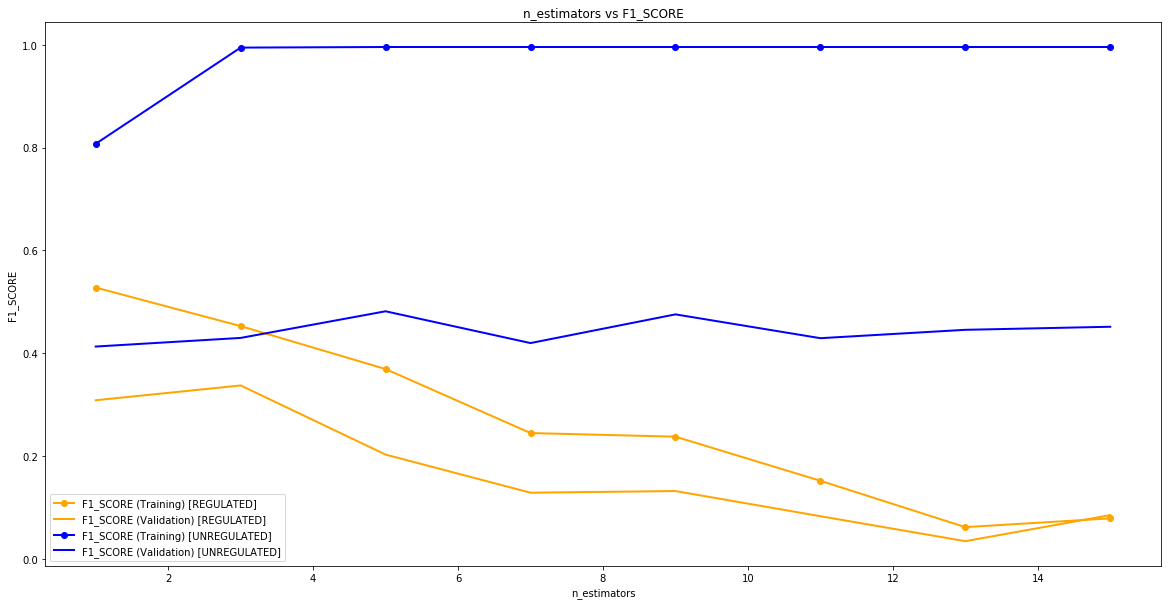

In [110]:
from sklearn.ensemble import AdaBoostRegressor

import pandas

accuracys_train = []
accuracys_val  = []
accuracys_train_unr = []
accuracys_val_unr  = []


for x in range(1,16,2):
    model_reg = AdaBoostRegressor(base_estimator=Tree(max_depth=10), n_estimators=x)
    model_reg.fit(X_train,y_train)
    
    model_unregulated = AdaBoostRegressor(base_estimator=Tree(), n_estimators=x)
    model_unregulated.fit(X_train,y_train)
    
    
    y_train_hat = model_reg.predict(X_train).astype('int')
    accuracys_train.append((x,f1_score(y_train,y_train_hat, average='binary')))
    y_val_hat = model_reg.predict(X_val).astype('int')
    accuracys_val.append((x,f1_score(y_val,y_val_hat, average='binary')))
    
    y_train_hat = model_unregulated.predict(X_train).astype('int')
    accuracys_train_unr.append((x,f1_score(y_train,y_train_hat, average='binary')))
    y_val_hat = model_unregulated.predict(X_val).astype('int')
    accuracys_val_unr.append((x,f1_score(y_val,y_val_hat, average='binary')))
    

df_accuracys_train = pandas.DataFrame(accuracys_train, columns=["n_estimators", "F1_SCORE (Training) [REGULATED]"])
df_accuracys_val = pandas.DataFrame(accuracys_val, columns=["n_estimators", "F1_SCORE (Validation) [REGULATED]"])
df_accuracys_train_unr = pandas.DataFrame(accuracys_train_unr, columns=["n_estimators", "F1_SCORE (Training) [UNREGULATED]"])
df_accuracys_val_unr = pandas.DataFrame(accuracys_val_unr, columns=["n_estimators", "F1_SCORE (Validation) [UNREGULATED]"])
    
plt.plot( 'n_estimators', 'F1_SCORE (Training) [REGULATED]', data=df_accuracys_train, marker='o', color='orange', linewidth=2)
plt.plot( 'n_estimators', 'F1_SCORE (Validation) [REGULATED]', data=df_accuracys_val, marker='', color='orange', linewidth=2)

plt.plot( 'n_estimators', 'F1_SCORE (Training) [UNREGULATED]', data=df_accuracys_train_unr, marker='o', color='blue', linewidth=2)
plt.plot( 'n_estimators', 'F1_SCORE (Validation) [UNREGULATED]', data=df_accuracys_val_unr, marker='', color='blue', linewidth=2)


plt.title('n_estimators vs F1_SCORE')
plt.ylabel('F1_SCORE')
plt.xlabel('n_estimators')
plt.legend()





    
    

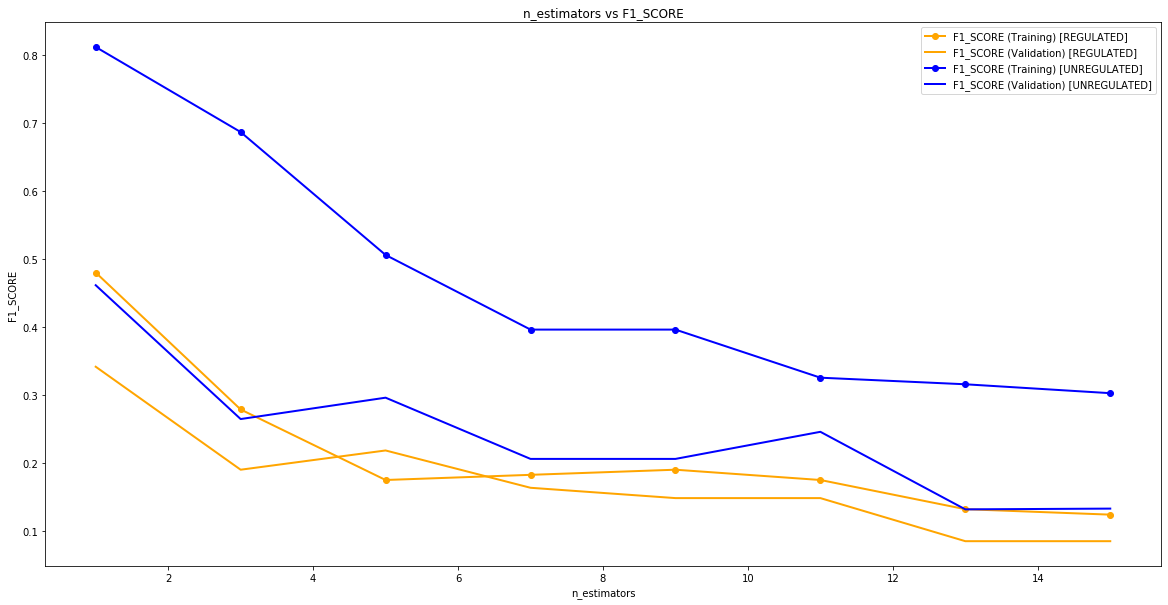

In [111]:
from sklearn.ensemble import RandomForestRegressor

import pandas

accuracys_train = []
accuracys_val  = []
accuracys_train_unr = []
accuracys_val_unr  = []


for x in range(1,16,2):
    model_reg = RandomForestRegressor(max_depth=10, n_estimators=x, n_jobs=-1)
    model_reg.fit(X_train,y_train)
    
    model_unregulated = RandomForestRegressor( n_estimators=x, n_jobs=-1)
    model_unregulated.fit(X_train,y_train)
    
    
    y_train_hat = model_reg.predict(X_train).astype('int')
    accuracys_train.append((x,f1_score(y_train,y_train_hat, average='binary')))
    y_val_hat = model_reg.predict(X_val).astype('int')
    accuracys_val.append((x,f1_score(y_val,y_val_hat, average='binary')))
    
    y_train_hat = model_unregulated.predict(X_train).astype('int')
    accuracys_train_unr.append((x,f1_score(y_train,y_train_hat, average='binary')))
    y_val_hat = model_unregulated.predict(X_val).astype('int')
    accuracys_val_unr.append((x,f1_score(y_val,y_val_hat, average='binary')))
    

df_accuracys_train = pandas.DataFrame(accuracys_train, columns=["n_estimators", "F1_SCORE (Training) [REGULATED]"])
df_accuracys_val = pandas.DataFrame(accuracys_val, columns=["n_estimators", "F1_SCORE (Validation) [REGULATED]"])
df_accuracys_train_unr = pandas.DataFrame(accuracys_train_unr, columns=["n_estimators", "F1_SCORE (Training) [UNREGULATED]"])
df_accuracys_val_unr = pandas.DataFrame(accuracys_val_unr, columns=["n_estimators", "F1_SCORE (Validation) [UNREGULATED]"])
    
plt.plot( 'n_estimators', 'F1_SCORE (Training) [REGULATED]', data=df_accuracys_train, marker='o', color='orange', linewidth=2)
plt.plot( 'n_estimators', 'F1_SCORE (Validation) [REGULATED]', data=df_accuracys_val, marker='', color='orange', linewidth=2)

plt.plot( 'n_estimators', 'F1_SCORE (Training) [UNREGULATED]', data=df_accuracys_train_unr, marker='o', color='blue', linewidth=2)
plt.plot( 'n_estimators', 'F1_SCORE (Validation) [UNREGULATED]', data=df_accuracys_val_unr, marker='', color='blue', linewidth=2)


plt.title('n_estimators vs F1_SCORE')
plt.ylabel('F1_SCORE')
plt.xlabel('n_estimators')
plt.legend()





    
    

In [115]:

model =AdaBoostRegressor(base_estimator=Tree(), n_estimators=9)
model.fit(X_train,y_train)

df_aux = pd.read_csv("Test_input.csv")

text_test = [word_extractor(text) for text in df_aux['tweet_content']]
X_test = vectorizer.transform(text_test)

y_pred = model.predict(X_test)

df_aux["id"] = np.arange(1, 1+y_pred.shape[0])
df_aux["harassment"] = y_pred.astype('int')
df_aux.drop(["tweet_content"], axis=1, inplace=True)
df_aux.to_csv("test_estimation.csv", index=False)

df_aux['harassment'].sum()

93

<a id="refs"></a>
## Referencias
[1] https://scikit-learn.org/stable/modules/ensemble.html  
[2] https://scikit-learn.org/stable/modules/tree.html  
[3] http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html  
[4] https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18